<a href="https://colab.research.google.com/github/ScumpikLau/ml-product-category-laura-corbu/blob/main/notebook/product_category_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and inspecting the dataset

- We will show a general view of our data, its structure and the data types

This will ensure the data is properly loaded and ready for further exploration

In [2]:
import pandas as pd

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/ScumpikLau/ml-product-category-laura-corbu/main/data/IMLP4_TASK_03-products.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)
# Show first few rows
print("First five rows:")
display(df.head())
# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (35311, 8)
First five rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


## Checking for missing values

- we will count for missing (NaN)values per column
- visualize missing values using a heatmap

In [3]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


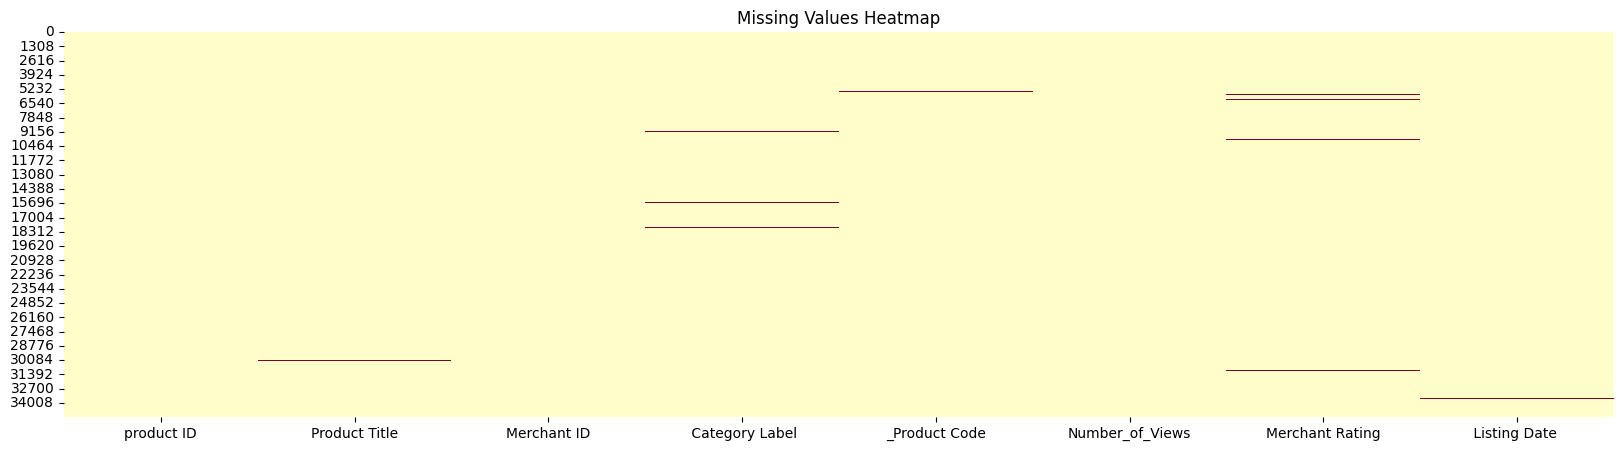

In [10]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

## Category Analysis

- checking how many products we have for each Category Label
- plot category distribution

In [12]:
# Count ocurrences of each Category Label
category_counts = df[' Category Label'].value_counts()

# Print counts
print("Category distribution (counts):")
print(category_counts)

Category distribution (counts):
 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64


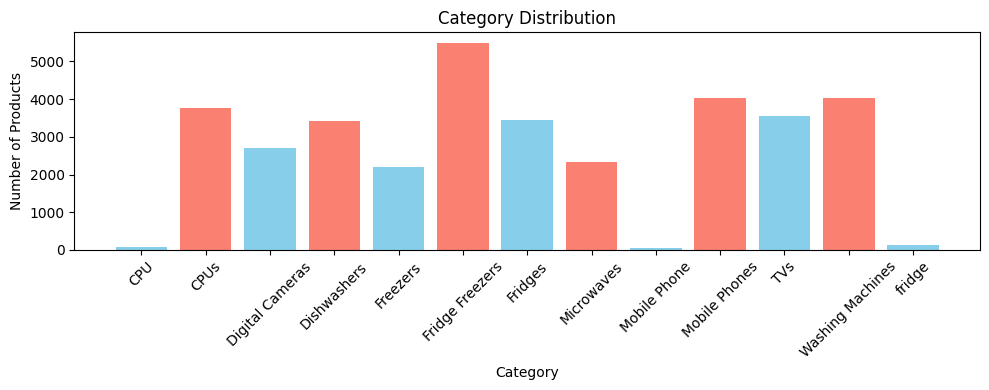

In [15]:
# Transform ' Category Label' column to category in order to plot the distribution
cats = df[' Category Label'].astype('category').cat.categories  # reading categories in order
category_counts = df[' Category Label'].value_counts().reindex(cats, fill_value=0) # reorder rows in the 'cats' order, replacing NaN with 0

# Plot category distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.bar(category_counts.index, category_counts.values, color=['skyblue', 'salmon'])
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Removing missing values

- in order to continue to work with the data we must resolve the missing values

In [16]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (34760, 8)
Missing values per column:
product ID         0
Product Title      0
Merchant ID        0
 Category Label    0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
 Listing Date      0
dtype: int64
